## Curso de Inteligencia Artificial

### API de Scikit-Learn



**Versiones a utilizar**

In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.22.4
SciPy version: 1.10.1
IPython version: 7.34.0
scikit-learn version: 1.2.2


## API de scikit-learn

Los principales "interfaces" en scikit-learn son (una clase puede implementar múltiples interfaces):

- **Estimador**:

    `estimador = obj.fit(data, targets)`

- **Predictor**:

    `prediccion = obj.predict(data)`

- **Transformador**:

    `n_data = obj.transform(data)`

- **Modelo**:

    `s = obj.score(data)`


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Ejemplos
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy import logical_or
from sklearn.linear_model import LogisticRegression
import sgd_separador
import regresion


In [41]:
from sklearn import datasets
from numpy import  logical_or
from sklearn.linear_model import LogisticRegression
iris=datasets.load_iris()
subconjunto=logical_or(iris.target==0, iris.target==1)
X=iris.data[subconjunto]
y=iris.target[subconjunto]
modelo=LogisticRegression()
modelo.fit(X,y)
print(modelo.coef_)

[[ 0.44036482 -0.90696813  2.30849566  0.96232763]]


In [27]:
#from sklearn.naive_bayes import GaussianNB
#modelo=GaussianNB()
#modelo.fit(X_train,Y_train)

In [33]:
# Para aprendizaje no supervisado
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
# Fijamos el modelo
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[5.936 2.77  4.26  1.326]
 [5.006 3.428 1.462 0.246]]


In [30]:
# Reduccion de la dimension

from sklearn.decomposition import PCA

# Creamos el modelo
pca = PCA(n_components=2)

# Fijamos el modelo
pca.fit(X)
print (pca.explained_variance_)

[2.77191092 0.22795013]


In [34]:
# Predictores
modelo = LogisticRegression()
modelo.fit(X, Y)

X_test = [[ 5.006,  3.418,  1.464,  0.244], [ 5.936,  2.77 ,  4.26 ,  1.326]]
modelo.predict(X_test)

array([0, 1])

>> Se encarga de cuantificar la confianza del cuantificador.

In [35]:
print (modelo.predict_proba(X_test))

[[0.98001834 0.01998166]
 [0.00994894 0.99005106]]


In [36]:
# Ejemplo más avanzado de SVM,  usando SVC (support vector classification)
#Parametro=gamma
from sklearn import svm
digitos = datasets.load_digits()
clasificador = svm.SVC(gamma=0.001, C=100.)

# Fijamos el modelo
clasificador.fit(digitos.data[:-1], digitos.target[:-1])

# Usamos los predictores en el modelo
clasificador.predict(digitos.data[-1:])


array([8])

In [37]:
# El metodo transform para aprendizaje no supervisado

pca = PCA(n_components=2)
pca.fit(X)

print (pca.transform(X)[0:5,:])

[[-1.6534434   0.19872334]
 [-1.6324908  -0.30649923]
 [-1.8183021  -0.27991275]
 [-1.65968123 -0.43813423]
 [-1.70289234  0.20759772]]


from sklearn.preprocessing import StandardScaler<RB>
scaler=StandardScaler()<BR>
sacler.fit(X_train)<BR>
X_train=scaler.transform(X_train)<BR>
X_text=scaler.transfrom(X_test)<BR>
#Se ajusta a las pruebas

El transformador se encarga de realizar preprocesamiento. Punto de partida del modelo(X-train). Mas adelante se puede utlizar para modificador los datos.

In [43]:
# El metodo fit.transform

pca = PCA(n_components=2)
print (pca.fit_transform(X)[0:5,:])


[[-1.6534434   0.19872334]
 [-1.6324908  -0.30649923]
 [-1.8183021  -0.27991275]
 [-1.65968123 -0.43813423]
 [-1.70289234  0.20759772]]


In [42]:
# Otros modelos
# Utilizamos DummyClassifier un clasificador que hace predicciones simples

from sklearn.dummy import DummyClassifier

modelo = DummyClassifier()
modelo.fit(X, y)

modelo.score(X, y)


0.5

Dos de las tareas más simples del aprendizaje automático es la `clasificación` y la `regresión`. Veamos el siguiente ejemplo:

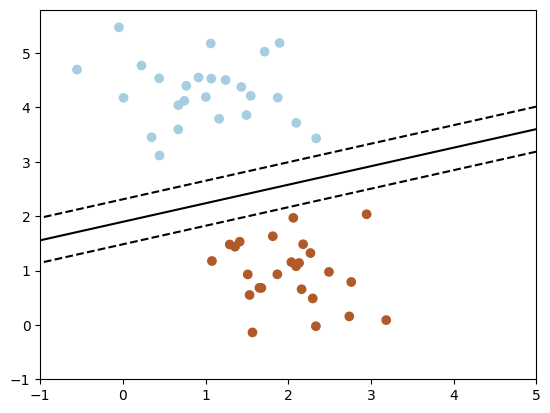

<Figure size 640x480 with 0 Axes>

In [44]:
%run sgd_separador.py

>>Grafico de dos dimensiones:
>>>Las lineas de separacion se puedes generalizar a nuevos datos.

Otra tarea del aprendizaje automático es la de `regressión`, que es el ajuste de una línea a un conjunto de datos.

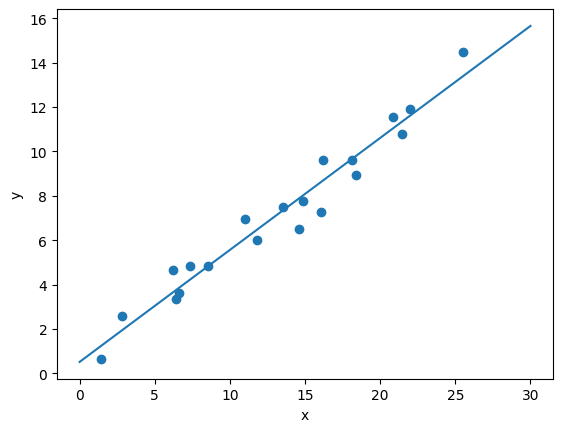

<Figure size 640x480 with 0 Axes>

In [45]:
%run regresion.py

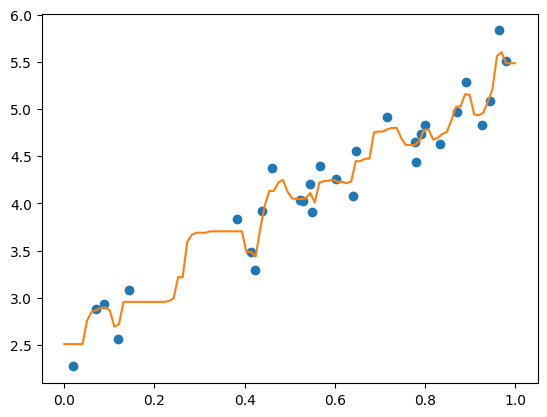

In [68]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
modelo = RandomForestRegressor()
np.random.seed(0)
X = np.random.rand(30, 1)
y = 3 * X.squeeze() + 2 + np.random.rand(30)
modelo.fit(X, y)
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = modelo.predict(X_fit)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)


###  Validación de modelos


In [46]:
# Para el conjunto de datos iris, la prediccion de los datos de entrada

from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


Una forma más útil examinar los resultados es  ver la `matriz de confusión (confusión matrix)`, o la matriz que muestra la frecuencia de las entradas y salidas:

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


>El modelo genera mal

In [59]:
from sklearn.model_selection import train_test_split

Xentrenamiento, Xtest, yentrenamiento, ytest = train_test_split(X, y)
clf.fit(Xentrenamiento, yentrenamiento)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[16  0  0]
 [ 0 12  0]
 [ 0  0 10]]


Esto muestra verdadero rendimiento de nuestro clasificador

Por esta razón, es muy importante utilizar  los datos de  `entrenamiento` y datos `test` en la evaluación de los  modelos.

#### Ejercicios de experimentación

1 . Carga el conjunto de datos ``diabetes`` usando ``sklearn.datasets.load_diabetes`` y realiza un análisis de acuerdo a las notas realizadas. Aplica ``LinearRegression``, ``Ridge`` y ``Lasso``  y visualiza los coeficientes.

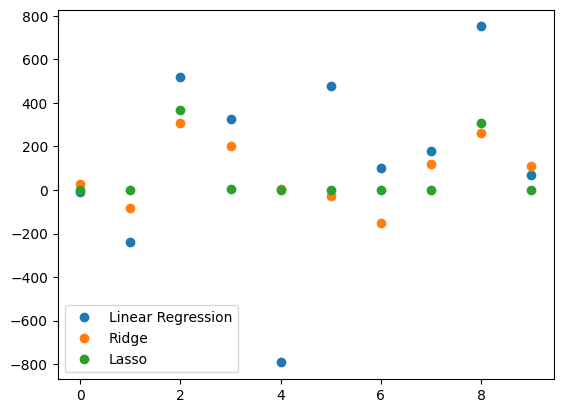

In [61]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

lr.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.plot(ridge.coef_, 'o', label='Ridge')
plt.plot(lasso.coef_, 'o', label='Lasso')
plt.legend()
plt.show()
